<a href="https://colab.research.google.com/github/thinhnguyen2026/BUS310/blob/main/in_class_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #for data analysis#
import numpy as np #for data analysis#
import matplotlib.pyplot as plt #for visualization#
import seaborn as sns #for better looking visualization
import scipy.stats as stats
import statsmodels.api as sm #library for statistics analysis#
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


import os


# List files and directories in the specified path
os.listdir('/content/drive/My Drive/BUS310/Data_BUS310')


# Correct path to your CSV file
file_path = '/content/drive/My Drive/BUS310/Data_BUS310/Advertising.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm successful loading
df.head()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 849.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9f2f25cf6a2f860c9b7dfa9a74149faca061dff76dc3a170d35724676cc4fffe
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting u

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#Simple linear regression

In [ ]:
X = MS(['TV']).fit_transform(df)
y = df['sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        19:37:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0326      0.458     15.360      0.0

In [ ]:
X = MS(['radio']).fit_transform(df)
y = df['sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           4.35e-19
Time:                        19:46:50   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3116      0.563     16.542      0.0

In [ ]:
X = MS(['newspaper']).fit_transform(df)
y = df['sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 16 Sep 2024   Prob (F-statistic):            0.00115
Time:                        19:47:00   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.3514      0.621     19.876      0.0

In [ ]:
X = MS(['TV','radio','newspaper']).fit_transform(df)
y = df['sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        19:47:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9389      0.312      9.422      0.0

In [ ]:
X = MS(['TV','radio']).fit_transform(df)
y = df['sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        19:50:16   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9211      0.294      9.919      0.0

#Correlation

In [ ]:
correlation_matrix =df.corr().round(2)
print(correlation_matrix)

            Unnamed: 0    TV  radio  newspaper  sales
Unnamed: 0        1.00  0.02  -0.11      -0.15  -0.05
TV                0.02  1.00   0.05       0.06   0.78
radio            -0.11  0.05   1.00       0.35   0.58
newspaper        -0.15  0.06   0.35       1.00   0.23
sales            -0.05  0.78   0.58       0.23   1.00


# Scatter plot

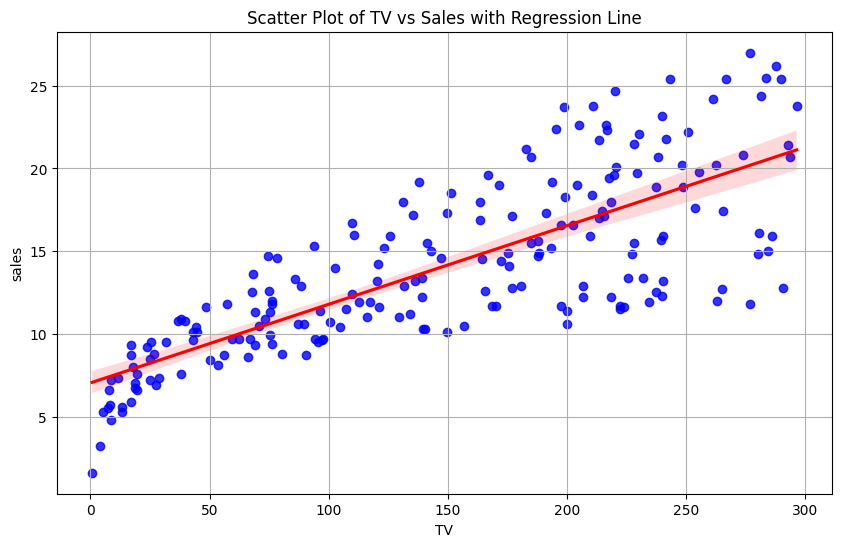

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='TV', y='sales', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Scatter Plot of TV vs Sales with Regression Line')

# Show plot
plt.grid(True)
plt.show()

# Show the plot
plt.show()

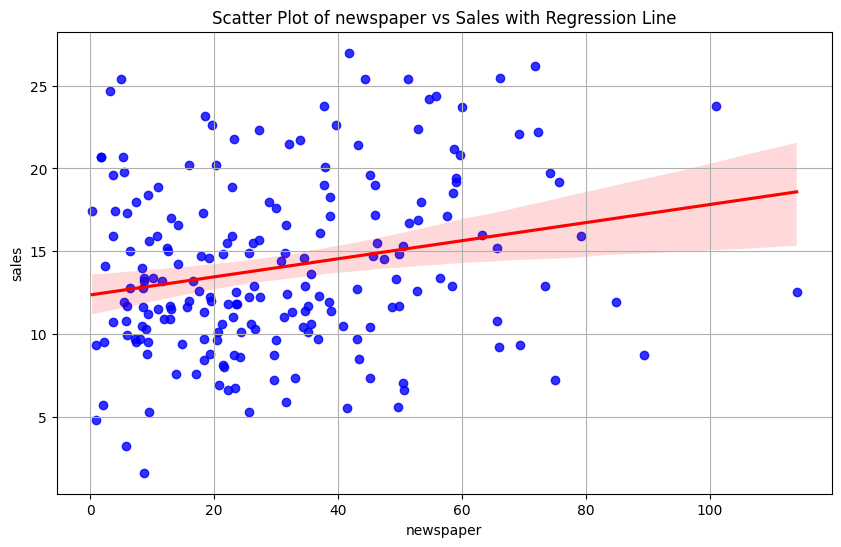

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='newspaper', y='sales', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('Scatter Plot of newspaper vs Sales with Regression Line')

# Show plot
plt.grid(True)
plt.show()

# Show the plot
plt.show()